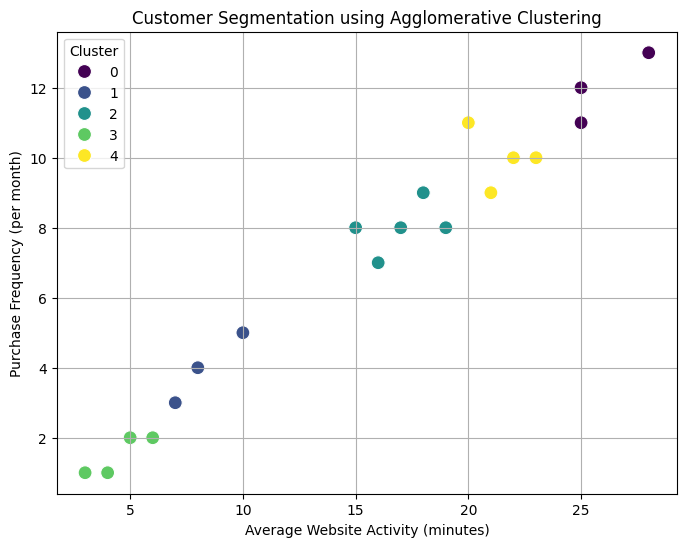


Cluster Assignments (Agglomerative Clustering):
    CustomerID  Cluster
0            1        3
1            2        1
2            3        2
3            4        2
4            5        0
5            6        4
6            7        3
7            8        3
8            9        2
9           10        2
10          11        1
11          12        1
12          13        4
13          14        4
14          15        0
15          16        0
16          17        3
17          18        3
18          19        2
19          20        4


In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_agg = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Website_Activity': [5, 7, 15, 18, 25, 22, 4, 6, 16, 19, 8, 10, 20, 23, 28, 25, 3, 5, 17, 21],
    'Purchase_Frequency': [2, 3, 8, 9, 12, 10, 1, 2, 7, 8, 4, 5, 11, 10, 13, 11, 1, 2, 8, 9]
}
df_agg = pd.DataFrame(data_agg)

# Select the features for clustering
X_agg = df_agg[['Website_Activity', 'Purchase_Frequency']]

# Scale the features (important for distance-based algorithms)
scaler_agg = StandardScaler()
X_scaled_agg = scaler_agg.fit_transform(X_agg)

# Choose the number of clusters (let's start with 3)
n_clusters_agg = 5

# Initialize and fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward') # 'ward' is a common linkage criterion
df_agg['Cluster'] = agg_clustering.fit_predict(X_scaled_agg)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Website_Activity', y='Purchase_Frequency', hue='Cluster', data=df_agg, palette='viridis', s=100)
plt.title('Customer Segmentation using Agglomerative Clustering')
plt.xlabel('Average Website Activity (minutes)')
plt.ylabel('Purchase Frequency (per month)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Print the cluster assignments
print("\nCluster Assignments (Agglomerative Clustering):")
print(df_agg[['CustomerID', 'Cluster']])

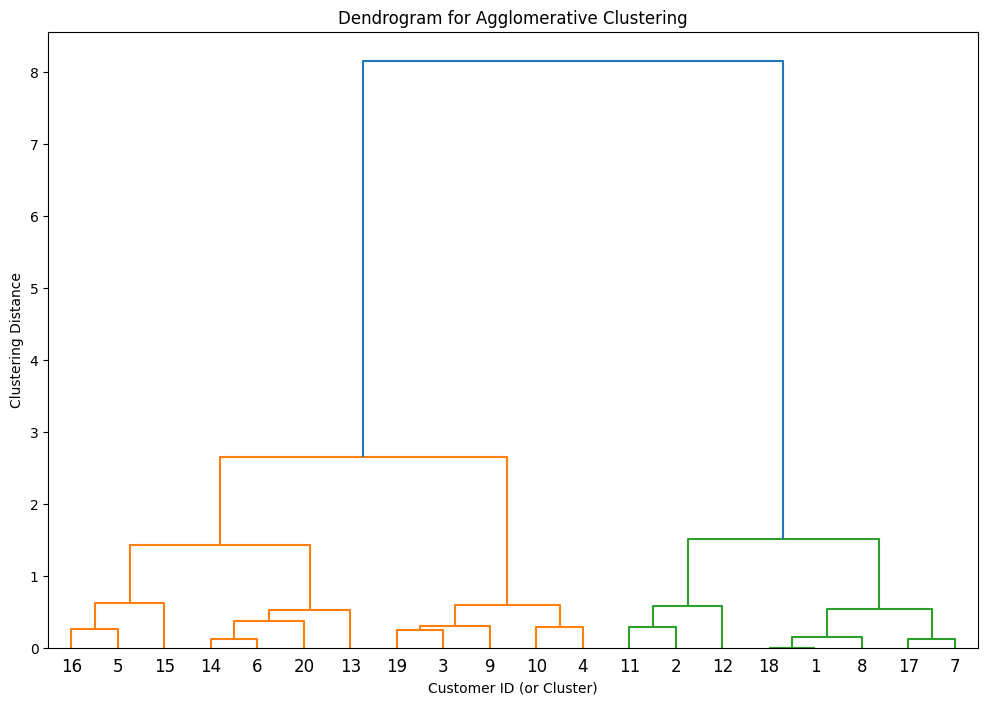

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the same dataset as before
data_dendro = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Website_Activity': [5, 7, 15, 18, 25, 22, 4, 6, 16, 19, 8, 10, 20, 23, 28, 25, 3, 5, 17, 21],
    'Purchase_Frequency': [2, 3, 8, 9, 12, 10, 1, 2, 7, 8, 4, 5, 11, 10, 13, 11, 1, 2, 8, 9]
}
df_dendro = pd.DataFrame(data_dendro)
X_dendro = df_dendro[['Website_Activity', 'Purchase_Frequency']]

# Scale the features
scaler_dendro = StandardScaler()
X_scaled_dendro = scaler_dendro.fit_transform(X_dendro)

# Perform hierarchical clustering using a linkage method (e.g., 'ward')
linked = linkage(X_scaled_dendro, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            labels=df_dendro['CustomerID'].tolist(), # Optional: Label leaves with customer IDs
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customer ID (or Cluster)')
plt.ylabel('Clustering Distance')
plt.show()